In [1]:
import pandas as pd
from plotnine import *

In [2]:
all_results = pd.read_parquet("all_results.parquet")
all_results.head()

,data_type,train_partition,test_partition,tpr,fpr,tss,hss2
0,uncorrected,1,2,0.932905,0.107541,0.825364,0.195362
1,uncorrected,1,3,0.926264,0.146183,0.780081,0.260134
2,uncorrected,1,4,0.914163,0.125664,0.788499,0.219343
3,uncorrected,1,5,0.921212,0.082313,0.838899,0.209261
4,corrected,1,2,0.966453,0.173082,0.793371,0.127414


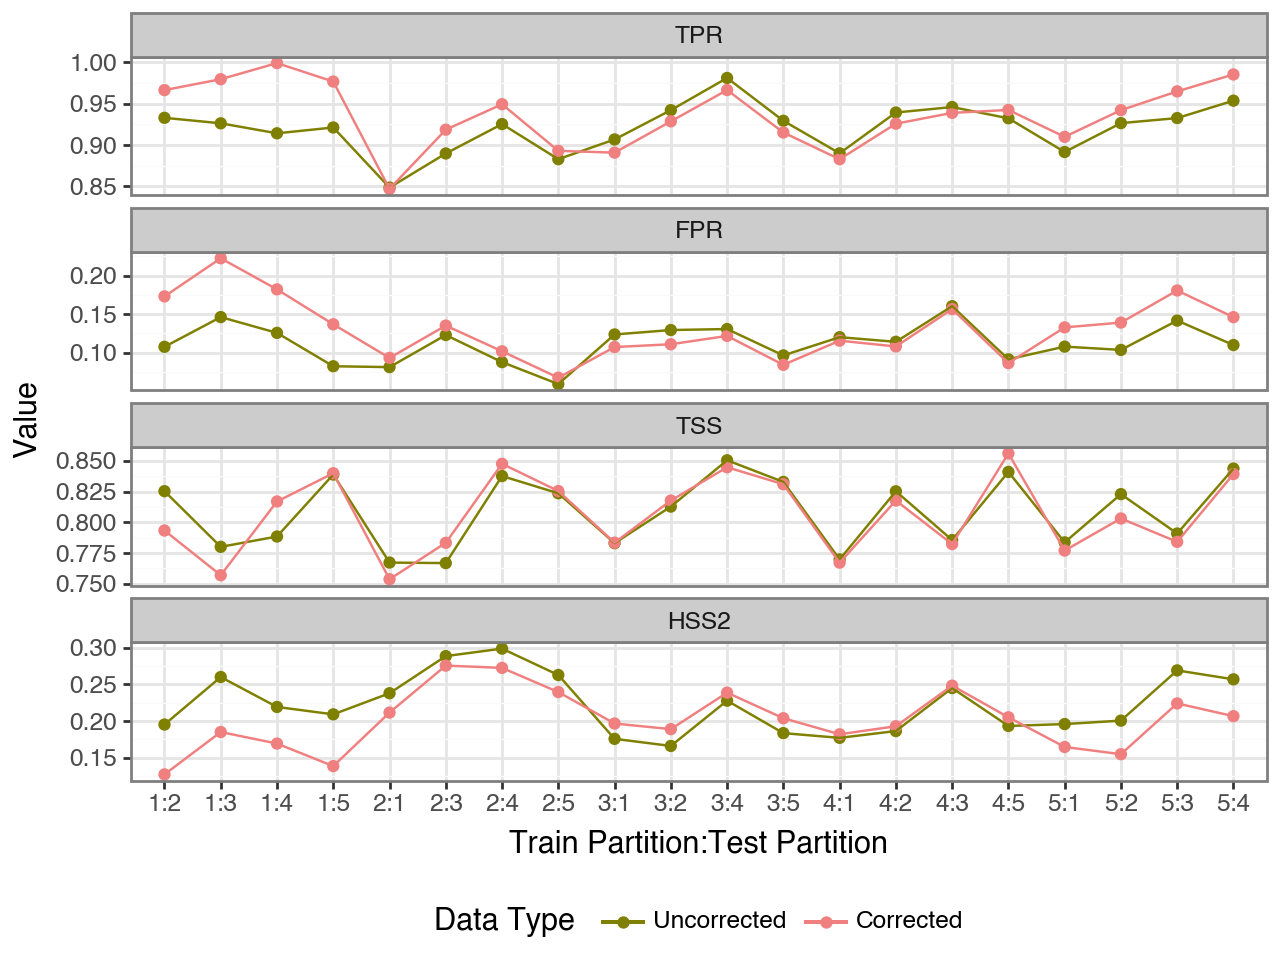

In [3]:
plot_data = all_results.melt(
    id_vars=["data_type", "train_partition", "test_partition"],
    var_name="metric", value_name="val"
)
plot_data["data_type"] = pd.Categorical(
    plot_data["data_type"].str.capitalize(), ["Uncorrected", "Corrected"]
)
plot_data["train_test_partitions"] = [
    f"{train_partition}:{test_partition}"
    for train_partition, test_partition
    in zip(plot_data["train_partition"], plot_data["test_partition"])
]
plot_data["train_test_partitions"] = pd.Categorical(
    plot_data["train_test_partitions"], ordered=True
)
plot_data["metric"] = pd.Categorical(
    plot_data["metric"].str.upper(), ["TPR", "FPR", "TSS", "HSS2"]
)

(
    ggplot(
        plot_data,
        aes(
            x="train_test_partitions", y="val",
            color="data_type", group="data_type"
        )
    ) +
    facet_wrap("metric", ncol=1, scales="free_y") +
    geom_point() +
    geom_line() +
    scale_color_manual({"Uncorrected": "olive", "Corrected": "lightcoral"}) +
    labs(x="Train Partition:Test Partition", y="Value", color="Data Type") +
    theme_bw() +
    theme(legend_position="bottom")
)